# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студентки гр. 2383 Анищенко Анастасия Ивановна и Бараева Елизавета Николаевна. Вариант №12.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

Дискретное преобразование Фурье:

$X(n) = \sum_{k=0}^{N-1} x_k e^{-i \frac{2 \pi n}{N} k}, \quad n = 0, 1, 2, ..., N - 1$

Сглаживание прямой линией по 5-ти точкам:

$y_n = \frac{1}{5} \sum_{k=n-2}^{k=n+2} s_k = \frac{1}{5} (s_{n-2} + s_{n-1} + s_{n} + s_{n+1} + s_{n+2})$

$H(w) = \frac{1}{5} (1 + 2cos(w) + 2cos(2w))$

Сглаживание прямой линией по 9-ти точкам:

$y_n = \frac{1}{9} \sum_{k=n-4}^{k=n+4} s_k = \frac{1}{9} (s_{n-4} + s_{n-3} + s_{n-2} + s_{n-1} + s_{n} + s_{n+1} + s_{n+2} + s_{n+3} + s_{n+4})$

$H(w) = \frac{1}{9} (1 + 2cos(w) + 2cos(2w) + 2cos(3w) + 2cos(4w))$

Численное дифференцирование 1-го порядка:

$y_{n} = \frac{s_{n+1} - s_{n-1}}{2h}$

$H(w) =  i sin(w)$

Формула прямоугольников:

$y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0$

$H(w) = \frac{1}{2 \cdot i \cdot sin(0.5w)}$

Формула трапеций:

$y_{n+1} = y_n + \frac{1}{2} (s_{n} + s_{n+1}), \quad y_0 = 0$

$H(w) = \frac{cos(0.5w)}{2 \cdot i \cdot sin(0.5w)}$

Формула Симпсона:

$y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_{n} + s_{n+1}), \quad y_0 = 0$

$H(w) = \frac{2 + cos(w)}{3 \cdot i \cdot sin(w)}$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import cmath as cm
import math as m
import random

In [46]:
# Функция сигнала
def s(t):
  return sum([A_norm[i] * m.cos(w[i] * t + phi[i]) for i in range(n)])

# Функция дискретного преобразования Фурье
def dft(x):
    X = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            X[n] += x[k] * np.exp(-1j * 2 * np.pi * n * k / N)
    return X

# Функция линейного сглаживания по 5-ти точкам
def smooth5_poly1(x):
    y = []
    for n in range(N):
        s = 0
        for k in range(-2, 3):
            if 0 <= n + k < N:
                s += x[n + k]
        y.append(s / 5)
    return y

# Функция линейного сглаживания по 9-ти точкам
def smooth9_poly1(x):
    y = []
    for n in range(N):
        s = 0
        for k in range(-4, 5):
            if 0 <= n + k < N:
                s += x[n + k]
        y.append(s / 9)
    return y

# Функция численного дифференцирования 1-го порядка
def diff1(x):
    y = []
    for n in range(N):
        s = 0
        for k in range(-1, 2, 2):
            if 0 <= n + k < N:
              if k == -1:
                s -= x[n + k]
              else:
                s += x[n + k]
        y.append(s / (2*T))
    return y

# Функция численного интегрирования по формуле прямоугольников и трапеций
def int_rectangle_and_trapeze(x):
  y = [0]
  for n in range(0, N - 1):
    y.append(y[n] + (x[n] + x[n + 1]) / 2)
  return y

# Функция численного интегрирования по формуле Симпсона
def int_Simpson(x):
  y = [0, 0]
  for n in range(2, N):
    y.append(y[n - 2] + (x[n - 2] + 4 * x[n - 1] + x[n]) / 3)
  return y

## Задание 1

In [24]:
# Дано
T = 1
n = 11
dw = m.pi * 0.1
N = 32
A = np.arange(1, 12)
random.shuffle(A)
A_norm = A / sum(A)
w = [dw * i for i in range(n)]
phi = [random.uniform(0, 0.5) for i in range(n)]

# Аналоговый сигнал
t_analog = np.arange(0, N, 0.001)
S_analog = [s(i) for i in t_analog]

# Дискретизированный сигнал
t_discrete = np.arange(N)
S_discrete = [s(i) for i in t_discrete]

## Задание 2

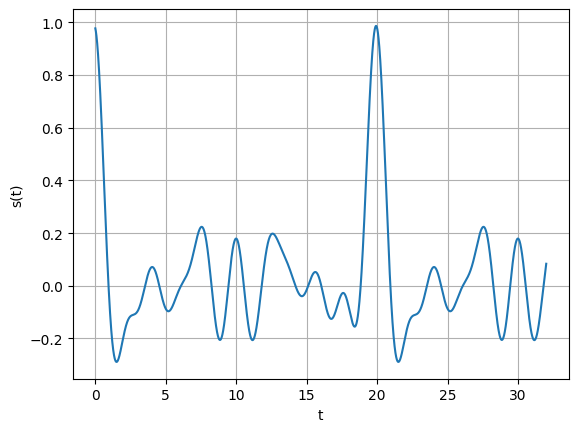

In [25]:
# График аналогового сигнала
plt.figure()
plt.plot(t_analog, S_analog)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid()
plt.show()

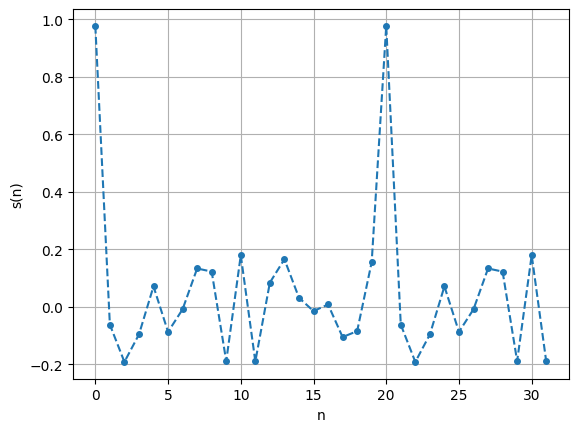

In [26]:
# График дискретизированного сигнала
plt.figure()
plt.plot(t_discrete, S_discrete, linestyle='--', marker='o', markersize=4)
plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.show()

## Задание 3

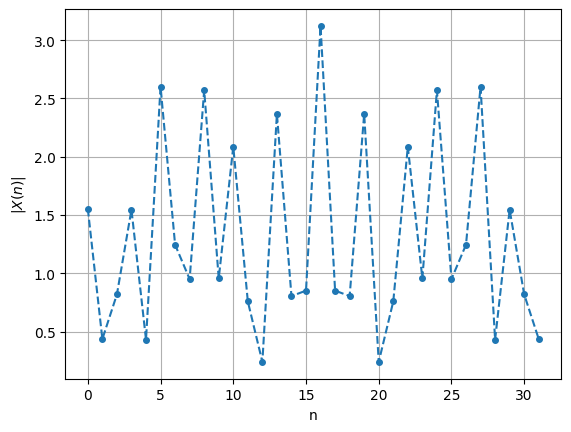

In [27]:
# Дискретное преобразование Фурье
Xn = dft(S_discrete)

# График дискретных отсчетов спектра дискретного сигнала
plt.figure()
plt.plot(t_discrete, np.abs(Xn), linestyle='--', marker='o', markersize=4)
plt.xlabel('n')
plt.ylabel('$|X(n)|$')
plt.grid()
plt.show()

## Задание 4

***Сглаживание прямой линией по 5-ти точкам:***

$y_n = \frac{1}{5} \sum_{k=n-2}^{k=n+2} s_k = \frac{1}{5} (s_{n-2} + s_{n-1} + s_{n} + s_{n+1} + s_{n+2})$

***Передаточная функция при сглаживании прямой линией по 5-ти точкам:***

$H(w) = \frac{1}{5} (1 + 2cos(w) + 2cos(2w))$

***Сглаживание прямой линией по 9-ти точкам:***

$y_n = \frac{1}{9} \sum_{k=n-4}^{k=n+4} s_k = \frac{1}{9} (s_{n-4} + s_{n-3} + s_{n-2} + s_{n-1} + s_{n} + s_{n+1} + s_{n+2} + s_{n+3} + s_{n+4})$

***Передаточная функция при сглаживании прямой линией по 9-ти точкам:***

$H(w) = \frac{1}{9} (1 + 2cos(w) + 2cos(2w) + 2cos(3w) + 2cos(4w))$

In [28]:
# Линейное сглаживание по 5-ти точкам
S_discrete_smooth5 = smooth5_poly1(S_discrete)

In [29]:
# Линейное сглаживание по 9-ти точкам
S_discrete_smooth9 = smooth9_poly1(S_discrete)

## Задание 5

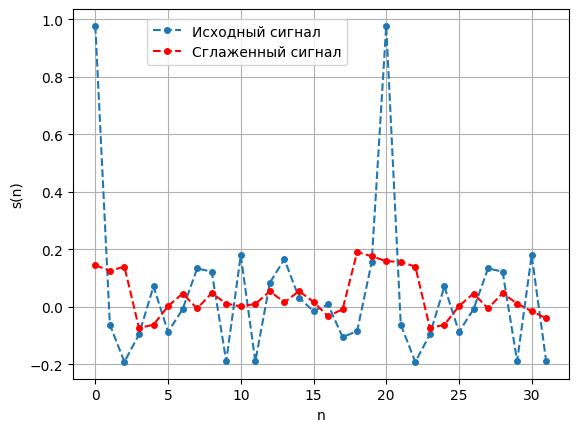

In [30]:
# График линейно сглаженного по 5-ти точкам дискретного сигнала совместно с исходным
plt.figure()
plt.plot(t_discrete, S_discrete, linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, S_discrete_smooth5, color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend(loc=(0.15, 0.85))
plt.grid()
plt.show()

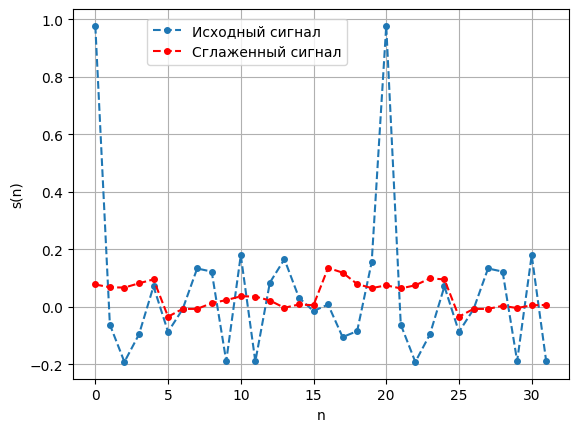

In [31]:
# График линейно сглаженного по 9-ти точкам дискретного сигнала совместно с исходным
plt.figure()
plt.plot(t_discrete, S_discrete, linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, S_discrete_smooth9, color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend(loc=(0.15, 0.85))
plt.grid()
plt.show()

## Задание 6

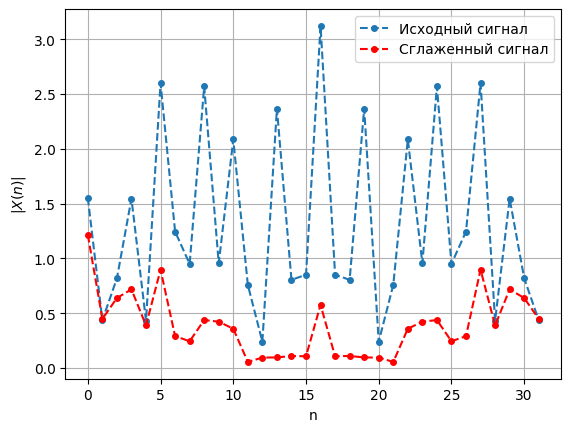

In [32]:
# ДПФ сигнала линейно сглаженного по 5-ти точкам
Xn_smooth5 = dft(S_discrete_smooth5)

# График дискретных отсчетов спектра дискретного сигнала линейно сглаженного по 5-ти точкам совместно с исходным
plt.figure()
plt.plot(t_discrete, np.abs(Xn), linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, np.abs(Xn_smooth5), color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('$|X(n)|$')
plt.legend()
plt.grid()
plt.show()

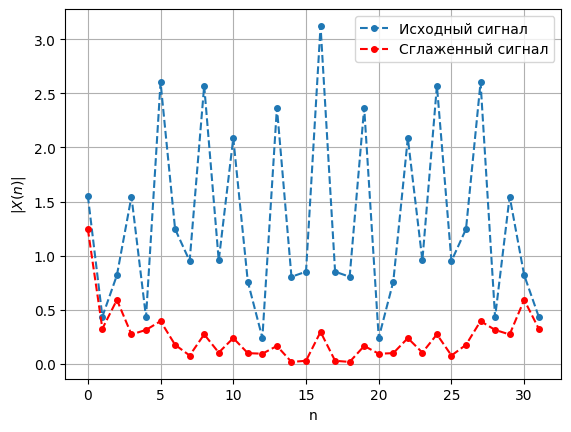

In [33]:
# ДПФ сигнала линейно сглаженного по 9-ти точкам
Xn_smooth9 = dft(S_discrete_smooth9)

# График дискретных отсчетов спектра дискретного сигнала линейно сглаженного по 9-ти точкам совместно с исходным
plt.figure()
plt.plot(t_discrete, np.abs(Xn), linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, np.abs(Xn_smooth9), color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('$|X(n)|$')
plt.legend()
plt.grid()
plt.show()

## Задание 7

По графику спектра видно, что он симметричен после значения $n$ равного 16, поэтому при анализе будет учитываться только 1-ая половина.

Линейное сглаживание имеет самую маленькую полосу пропускания: начальные отсчеты остаются почти без изменений. Средние и последние отсчеты подавляются: для сглаживания по 5-ти точкам сигнал слабо повторяет форму исходного, в то время как для 9-ти точек сигнал не похож на исходный. Полученный результат соответствует значениям $H(w)$.


## Задание 8(a)

#### Пункт 4

***Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка:***

$y_{n} = \frac{s_{n+1} - s_{n-1}}{2h}$

***Передаточная функция дискретного фильтра, соответствующего численному дифференцированию 1-го порядка:***

$H(w) =  i sin(w)$

In [34]:
# Применение дискретного фильтра, соответствующего численному дифференцированию 1-го порядка
S_discrete_diff1 = diff1(S_discrete)

#### Пункт 5

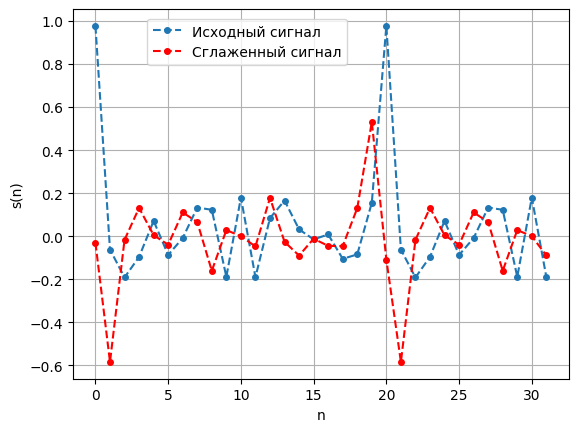

In [35]:
# График исходного сигнала и сигнала, полученного после фильтрации методом численного дифференцирования 1-го порядка
plt.figure()
plt.plot(t_discrete, S_discrete, linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, S_discrete_diff1, color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend(loc=(0.15, 0.85))
plt.grid()
plt.show()

#### Пункт 6

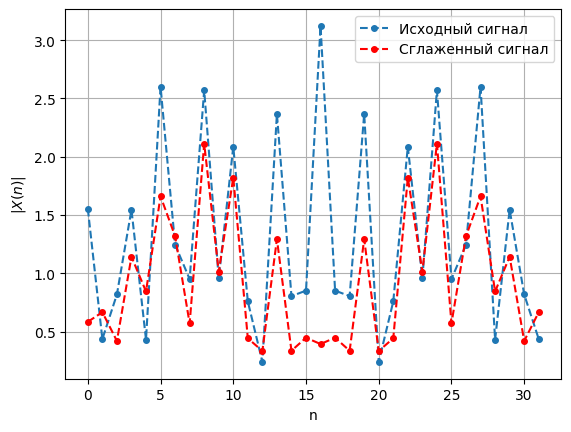

In [36]:
# ДПФ сигнала, полученного после фильтрации методом численного дифференцирования 1-го порядка
Xn_diff1 = dft(S_discrete_diff1)

# График дискретных отсчетов спектра дискретного сигнала после фильтрации совместно с исходным
plt.figure()
plt.plot(t_discrete, np.abs(Xn), linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, np.abs(Xn_diff1), color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('$|X(n)|$')
plt.legend()
plt.grid()
plt.show()

#### Пункт 7

По графику спектра видно, что он симметричен после значения $n$ равного 16, поэтому при анализе будет учитываться только 1-ая половина.

Сигнал, полученный после фильтрации методом численного дифференцирования 1-го порядка, почти повторяет форму исходного сигнала, немного ослабляя и сглаживая его пики. На первых и последних отсчетах наблюдается подавление сигнала. Это происходит, потому что за пределами диапазона сигнал равен нулю. Полученный результат соответствует значениям $H(w)$.

## Задание 8(b)

#### Пункт 4

***Дискретный фильтр, соответствующий численному интегрированию по формуле прямоугольников:***

$y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0$

***Передаточная функция дискретного фильтра, соответствующего численному интегрированию по формуле прямоугольников:***

$H(w) = \frac{1}{2 \cdot i \cdot sin(0.5w)}$

***Дискретный фильтр, соответствующий численному интегрированию по формуле трапеций:***

$y_{n+1} = y_n + \frac{1}{2} (s_{n} + s_{n+1}), \quad y_0 = 0$

***Передаточная функция дискретного фильтра, соответствующего численному интегрированию по формуле трапеций:***

$H(w) = \frac{cos(0.5w)}{2 \cdot i \cdot sin(0.5w)}$

***Дискретный фильтр, соответствующий численному интегрированию по формуле Симпсона:***

$y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_{n} + s_{n+1}), \quad y_0 = 0$

***Передаточная функция дискретного фильтра, соответствующего численному интегрированию по формуле Симпсона:***

$H(w) = \frac{2 + cos(w)}{3 \cdot i \cdot sin(w)}$

In [37]:
# Применение дискретного фильтра, соответствующего численному интегрированию по формулам прямоугольников и трапеций
S_discrete_rectangle_and_trapeze = int_rectangle_and_trapeze(S_discrete)

In [47]:
# Применение дискретного фильтра, соответствующего численному интегрированию по формуле Симпсона
S_discrete_Simpson = int_Simpson(S_discrete)

#### Пункт 5

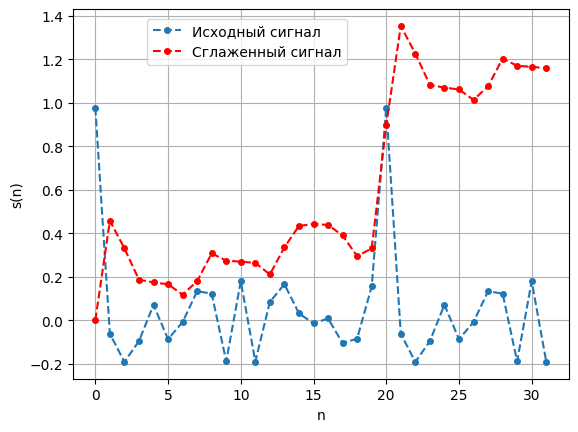

In [39]:
# График исходного сигнала и сигнала, полученного после фильтрации по формулам прямоугольников и трапеций
plt.figure()
plt.plot(t_discrete, S_discrete, linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, S_discrete_rectangle_and_trapeze, color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend(loc=(0.15, 0.85))
plt.grid()
plt.show()

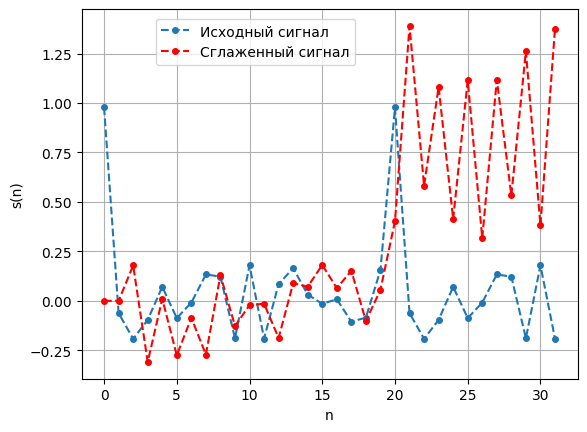

In [48]:
# График исходного сигнала и сигнала, полученного после фильтрации по формуле Симпсона
plt.figure()
plt.plot(t_discrete, S_discrete, linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, S_discrete_Simpson, color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend(loc=(0.15, 0.85))
plt.grid()
plt.show()

#### Пункт 6

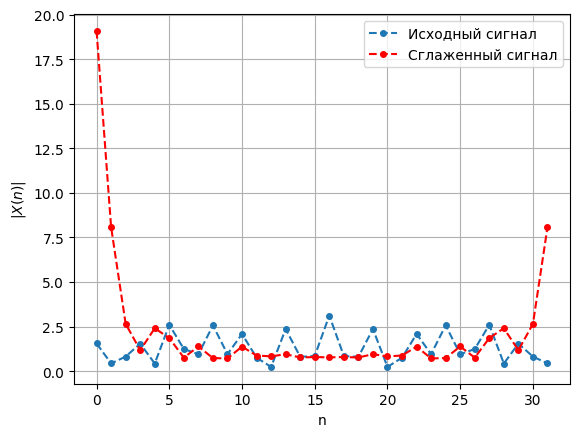

In [41]:
# ДПФ сигнала, полученного после фильтрации по формулам прямоугольников и трапеций
Xn_rectangle_and_trapeze = dft(S_discrete_rectangle_and_trapeze)

# График дискретных отсчетов спектра дискретного сигнала после фильтрации совместно с исходным
plt.figure()
plt.plot(t_discrete, np.abs(Xn), linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, np.abs(Xn_rectangle_and_trapeze), color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('$|X(n)|$')
plt.legend()
plt.grid()
plt.show()

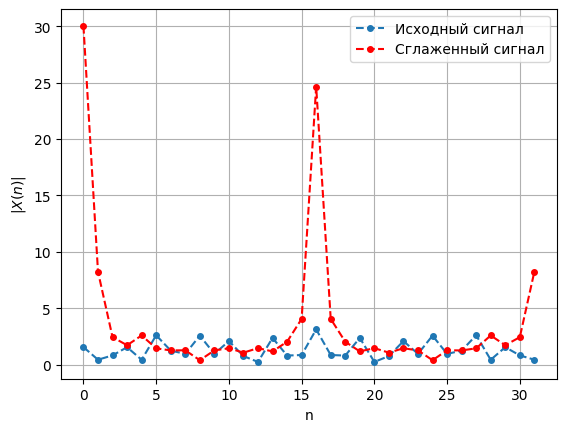

In [42]:
# ДПФ сигнала, полученного после фильтрации по формуле Симпсона
Xn_Simpson = dft(S_discrete_Simpson)

# График дискретных отсчетов спектра дискретного сигнала после фильтрации совместно с исходным
plt.figure()
plt.plot(t_discrete, np.abs(Xn), linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, np.abs(Xn_Simpson), color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('$|X(n)|$')
plt.legend()
plt.grid()
plt.show()

#### Пункт 7

По графику спектра видно, что он симметричен после значения $n$ равного 16, поэтому при анализе будет учитываться только 1-ая половина.

Сигналы, полученные после фильтрации по формулам прямоугольников, трапеций и Симпсона, резко усиливают низкие частоты и подавляют быстрые колебания на средних частотах. В отличие от других метод Симпсона усиливает высокие частоты. Это происходит из-за приближения графика передаточной функции к асимптотам  в значениях примерно равными 0 и 0,5. Полученный результат соответствует значениям $H(w)$.

## Задание 9

В ходе выполнения лабораторной работы был сформирован дискретный сигнал посредством дискретизации, с помощью ДПФ были найдены дискретные отсчеты спектра дискретного сигнала, было проведено сглаживание сигнала полиномом 1-ой степени, методом численного дифференцирования 1-го порядка, по формулам прямоугольников, трапеций и Симпсона. С помощью ДПФ были найдены дискретные отсчеты спектра дискретного сигнала после его фильтрации. По полученным сигналам были построены графики. Был проведен сопоставительный анализ результатов на соответствие значениям $H(w)$: практические результаты соответствуют теоретическим передаточным функциям, рассчитанным в предыдущих работах. Для формулы прямоугольников была проведена аппроксимация сигнала в точке $s_{n+\frac{1}{2}}$. Анализ показал, что линейные сглаживающие фильтры по 5-ти и 9-ти точкам подавляют средние и высокие частоты, фильтр численного дифференцирования сильно ослабляет низкие частоты, а интегрирующие фильтры усиливают низкие, подавляя быстрые колебания, метод Симпсона при этом еще усиливает высокие частоты.